## Week 2 : Linear Regression
```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
3.1 Overfitting & underfitting
```

<hr>

<img src="https://www.alpharithms.com/wp-content/uploads/1156/slope-intercept-vs-linear-regression-equations.jpg"/>



## Typical ML model Training Procedure

1. Define the Task (Supervised or unsupervised Learning, Classification or Regression)  
1. Import necessary libraries
1. Load and Explore the dataset (visualization) 
1. Preprocess the Data & split to train/test  (feature selection, scaling, normalization, etc..)
1. Build, Train and Test Model
1. Evaluate model using appropiate evaluation metrics (MSE, $R^2$, accuracy, f-score, precision, recall, etc.. )

## 1. Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
<br>
<br>
<center><b>Simple Linear Regression</b></center>

$$y = \beta_0 + \beta_1x_1$$

### 1.2 Import necessary libraries

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 1.3 Load from database and Explore the dataset

In [8]:
from sqlalchemy import create_engine, text

session_engine = create_engine('sqlite:///ml-regression.db')

with session_engine.connect() as conn: 
    student_scores_df = pd.read_sql_query(text('SELECT * FROM student_scores'), conn) 

student_scores_df.drop(columns=['index'], inplace=True)
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 1.3.1 Data profile and Statistics 

<span style="color:red">Task : Get data profile and save it as `.html`</span>

In [9]:
import os
from ydata_profiling import ProfileReport

student_scores_df.describe()

if not os.path.exists(os.path.join(os.getcwd(), "data_profile_student_scores.html")):
	report = ProfileReport(student_scores_df)
	report.to_file('data_profile_student_scores.html')

ModuleNotFoundError: No module named 'ydata_profiling'

### 1.3.1 Visualization

Plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data points. Usually Matplotlib is used but some other libraries exist i.e [Plotly](https://github.com/plotly/plotly.py), [Seaborn](https://seaborn.pydata.org/),[Geoplotlib](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide), [Gleam](https://github.com/dgrtwo/gleam), [ggplot](https://github.com/tidyverse/ggplot2)

**Remember :** Plot should have a title, axis labels, and legend for easy interpretation

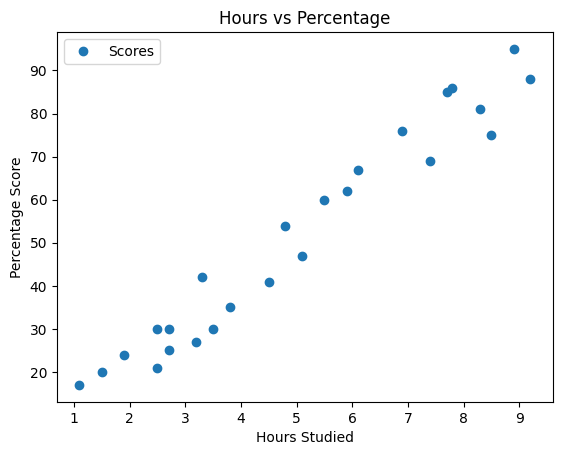

In [10]:
student_scores_df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### 1.4 Preprocess the Data & split to train set and test set

<span style="color:red">Task : split the data into train (80%) and test (20%)</span>

In [11]:
X = student_scores_df.iloc[:, :-1].values
y = student_scores_df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

### 1.5 Build, Train and Test ModelLinear Regression Model

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Model intercept : 4.538443321755629
Model coefficient : [9.5216293]


In [13]:
eval_df

,Actual,Predicted
0,25,30.246842
1,21,28.342517
2,20,18.820887
3,30,30.246842
4,30,37.864146


### 1.5 Evaluate model using appropiate evaluation metrics

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.375892011367235
Mean Squared Error: 28.947586734260103
Root Mean Squared Error: 5.380296156742685


## 2. Multiple Linear Regression

Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.
We seek a model of the form:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n.$$

### 2.3  Load and Explore the dataset

In [15]:
with session_engine.connect() as conn:
    petrol_consumption_df = pd.read_sql_query(text('SELECT * FROM petrol_consumption'), conn)

petrol_consumption_df.drop('index', axis=1, inplace=True)
petrol_consumption_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [16]:
petrol_consumption_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


### 2.4 Preprocess the Data & split to train set and test set

In [17]:
X = petrol_consumption_df.drop('Petrol_Consumption', axis=1)
y = petrol_consumption_df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.5 Build, Train and Test Model Regression Model

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

Model intercept : 425.59933220324206
Model coefficients : [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


### 2.6 Evaluate model using appropiate evaluation metrics

<span style="color:red">Task 1 : Use the predict function in the model(`regressor`) to predict the output of the testset(`X_test`) and  print it. </span>

<span style="color:red">Task  2 : Measure the performance of the model using: <br>     </span>
1. root mean squared error 
1. mean absolute error 
1. coefficient of determination $R^2$. See [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for $R^2$.

In [19]:
y_predict = regressor.predict(X_test)
print(y_predict)

[469.39198872 545.64546431 589.66839402 569.7304133  649.77480909
 646.63116356 511.60814841 672.47517717 502.07478157 501.2707342 ]


In [20]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Coefficient pf Determination R2:', metrics.r2_score(y_test, y_predict))

Root Mean Squared Error: 68.31064915215173
Mean Absolute Error: 56.82224747896472
Coefficient pf Determination R2: 0.20361932410121653


## 3. Polynomial Regression, Underfitting & Overfitting

Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.

1. Why do we need it?
1. Which order of the polynomial should we choose? 
2. should we always pick the most complex model? 



### 3.2 Import libraries

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### 3.3 Load and Explore the dataset
<span style="color:red">Task : generate synthetic dataset by adding some random gaussian noise to a cosine function.</span>

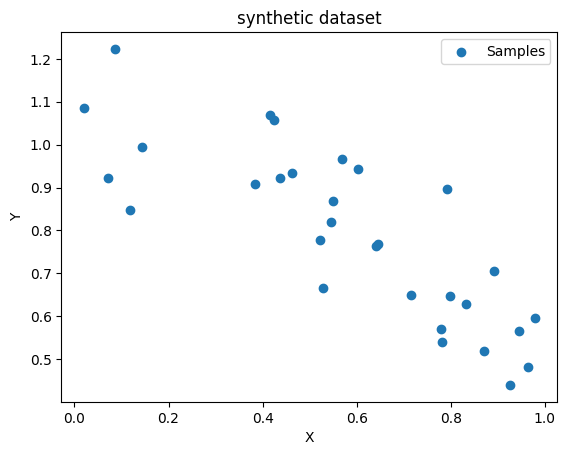

In [22]:
#  function
def fn(X):
    #Task : one line of code
    funky = np.cos(X)
    return funky

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = fn(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y,label="Samples")
plt.title('synthetic dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

### 3.4 Preprocess the Data, build model and evaluate model 

* We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.
* We will evaluate our model using cross validation

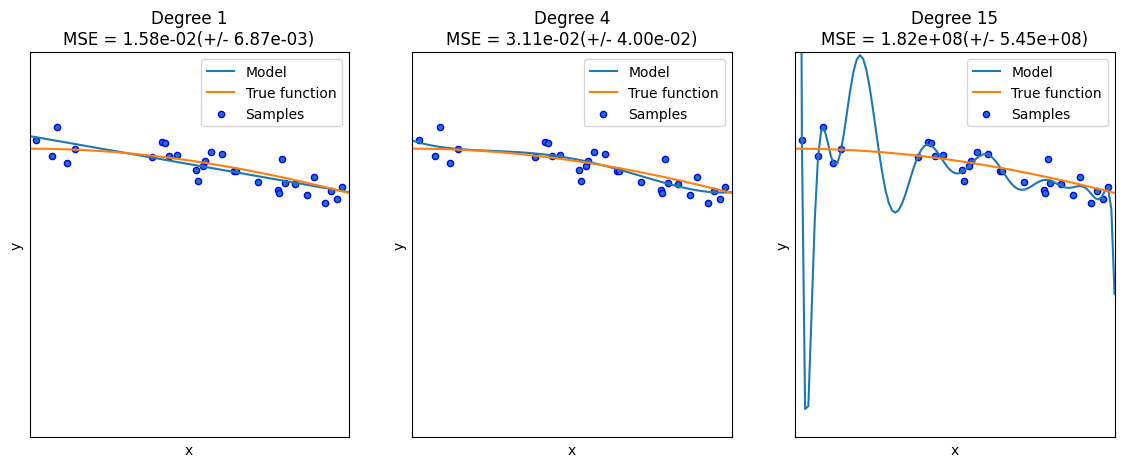

In [23]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, fn(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## <center>Self practice</center>

* Using steel industry energy consumption dataset from ([Link](https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption)) or `ml-regression.db`.
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Train a multiple linear regression model that will predict the energy consumption `(Usage_kWh)`.
    1. Print the model `Mean Absolute Error`, `Mean Squared Error` and `Root Mean Squared Error`


* Select one independent and select `Usage_kWh` as dependent variable 
    1. Visualise the data (using `matplotlib`)
    1. Create a Polynomial Regression model using `[1,5,24]` as degrees
    1. Explain your observations in terms of Over-fitting, Under-fitting, Bias-Variance trade-offs.

* Write a brief explanation of the insights that you got from the datasets  

In [24]:
from sqlalchemy import create_engine
engine = create_engine("sqlite+pysqlite:///ml-regression.db", echo=False)
connection = engine.connect()
data = pd.read_sql_table(table_name='steel_industry_data', con=connection)
# let's rename the target to easily identify it
data.rename(columns={'Usage_kWh': "y"}, inplace=True)
data.head()

,index,date,y,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [25]:
# Let us view the data report to realize what has to be done with the data
# before a linear regression model can be built
import os
if not os.path.exists(os.path.join(os.getcwd(), "data-linear-regression.html")):
	regression_report = ProfileReport(data)
	regression_report.to_file('data-linear-regression.html')

In [37]:
# let's split the data
X_train, X_test = train_test_split(data, train_size=0.8, random_state=0)

In [38]:
X_train.nunique()

index                                   28032
date                                    28032
y                                        3207
Lagging_Current_Reactive.Power_kVarh     1913
Leading_Current_Reactive_Power_kVarh      767
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             4897
Leading_Current_Power_Factor             3038
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [42]:
# drop 'index' and 'date' for 
X_train.drop(columns=['index', 'date'], inplace=True)
X_test.drop(columns=['index', 'date'], inplace=True)

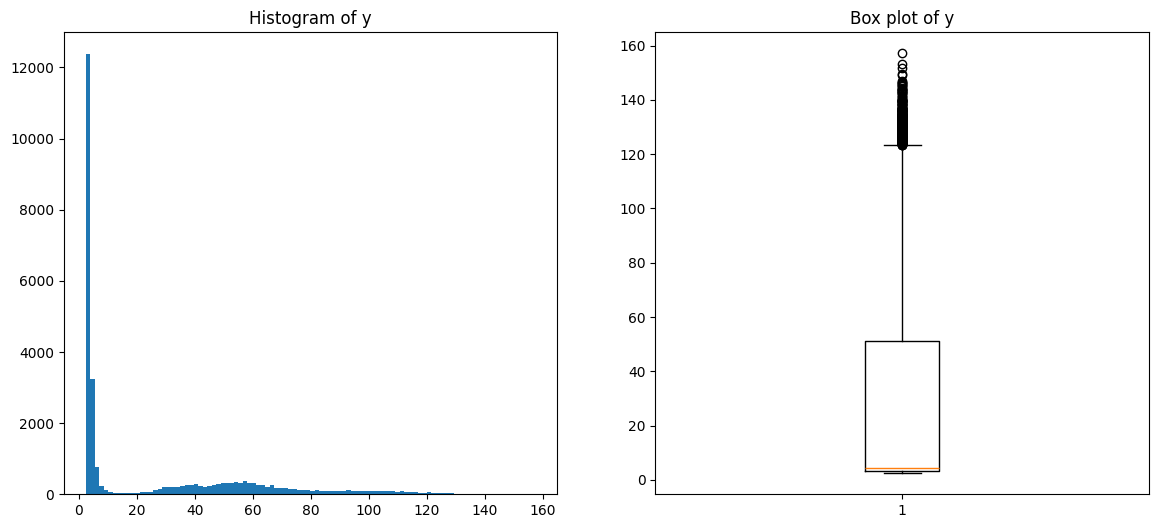

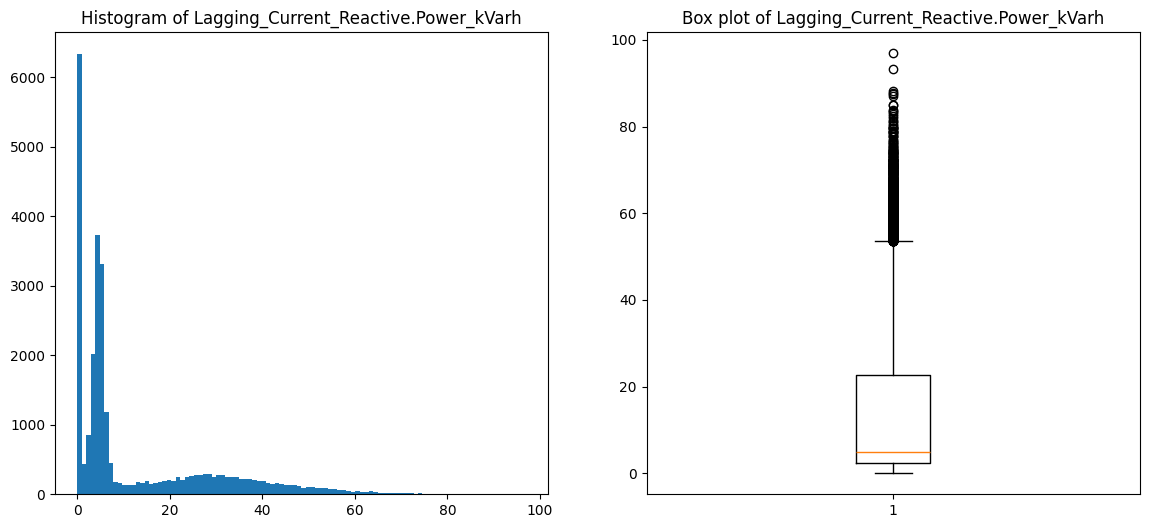

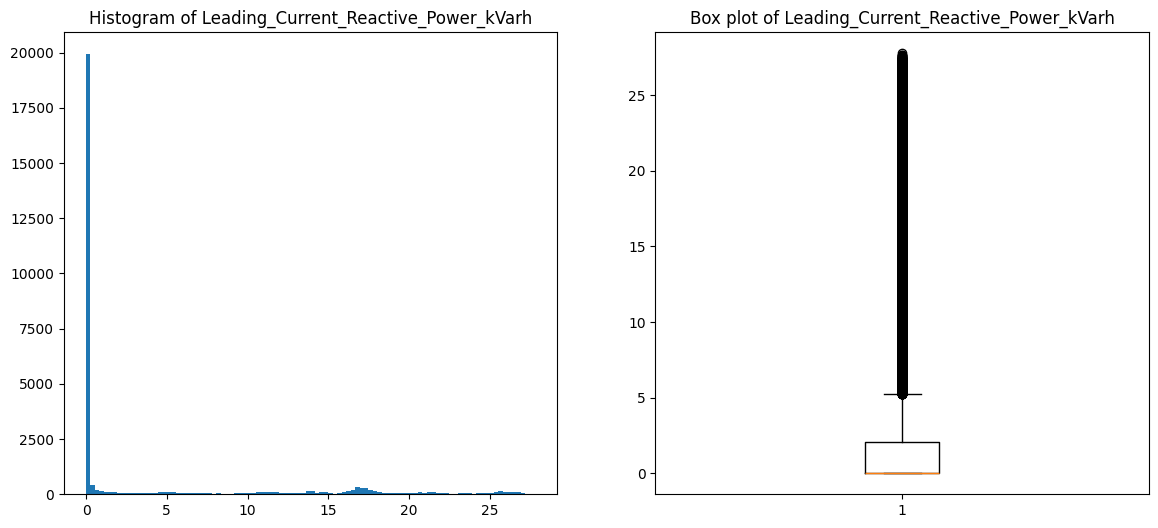

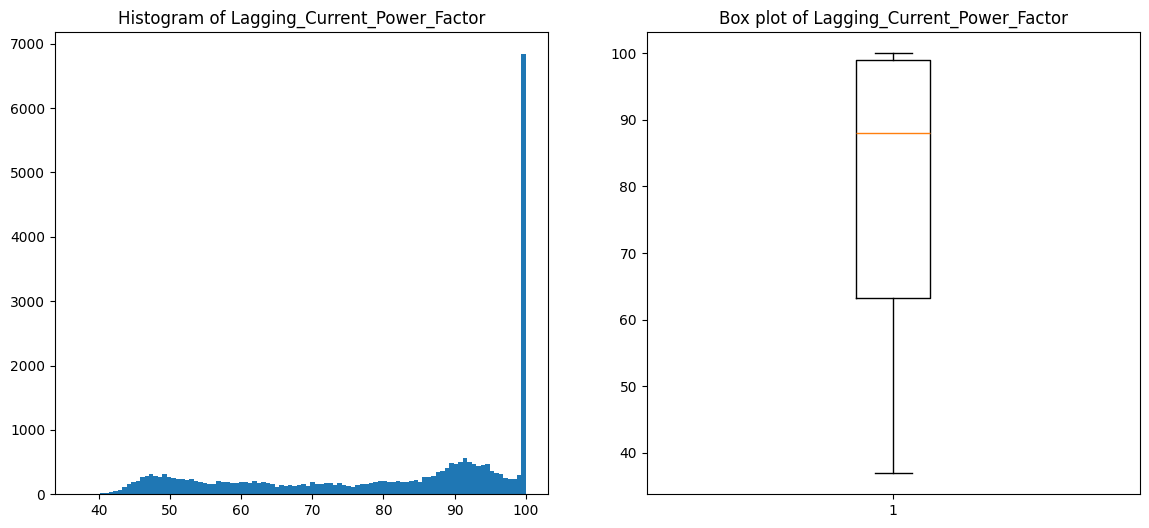

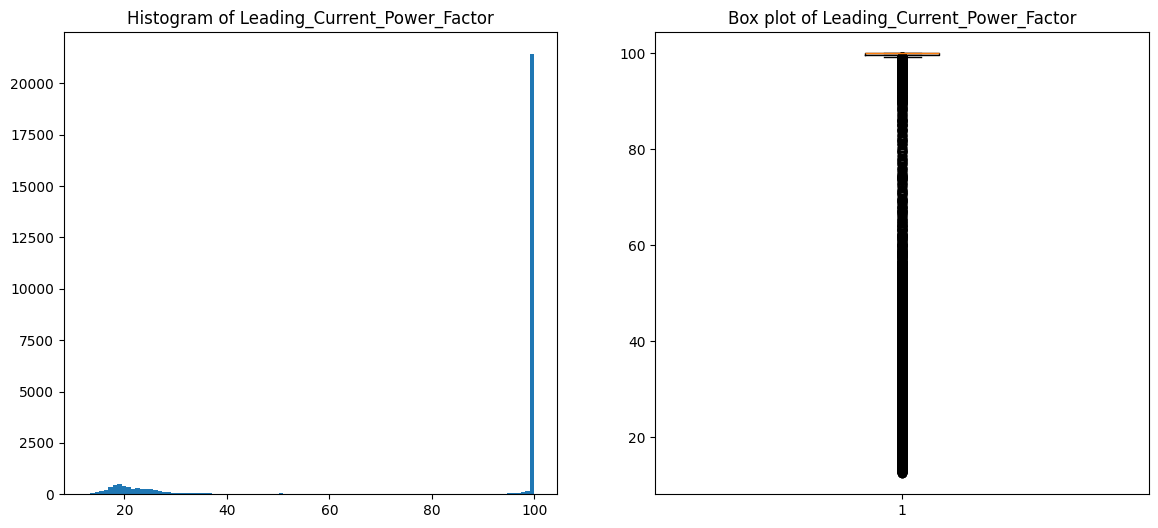

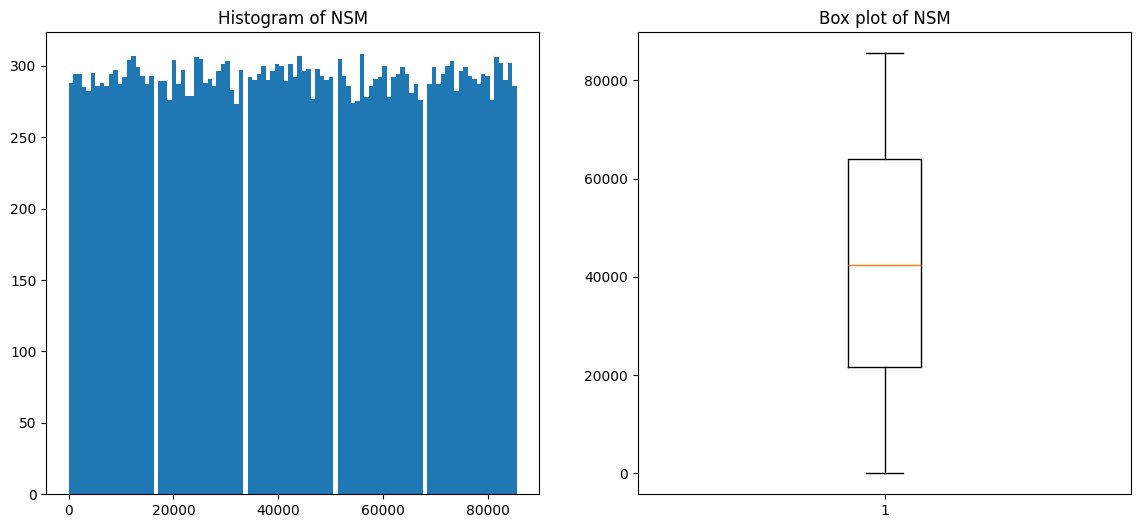

In [48]:
from datakit.visualize import visualize as vis

continuous_cols = [c for c in X_train.columns if X_train[c].nunique() > 10]
continuous_cols

# fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

for c in continuous_cols:    
	vis.visualize_continuous_distribution(X_train[c], sequence_name=c)


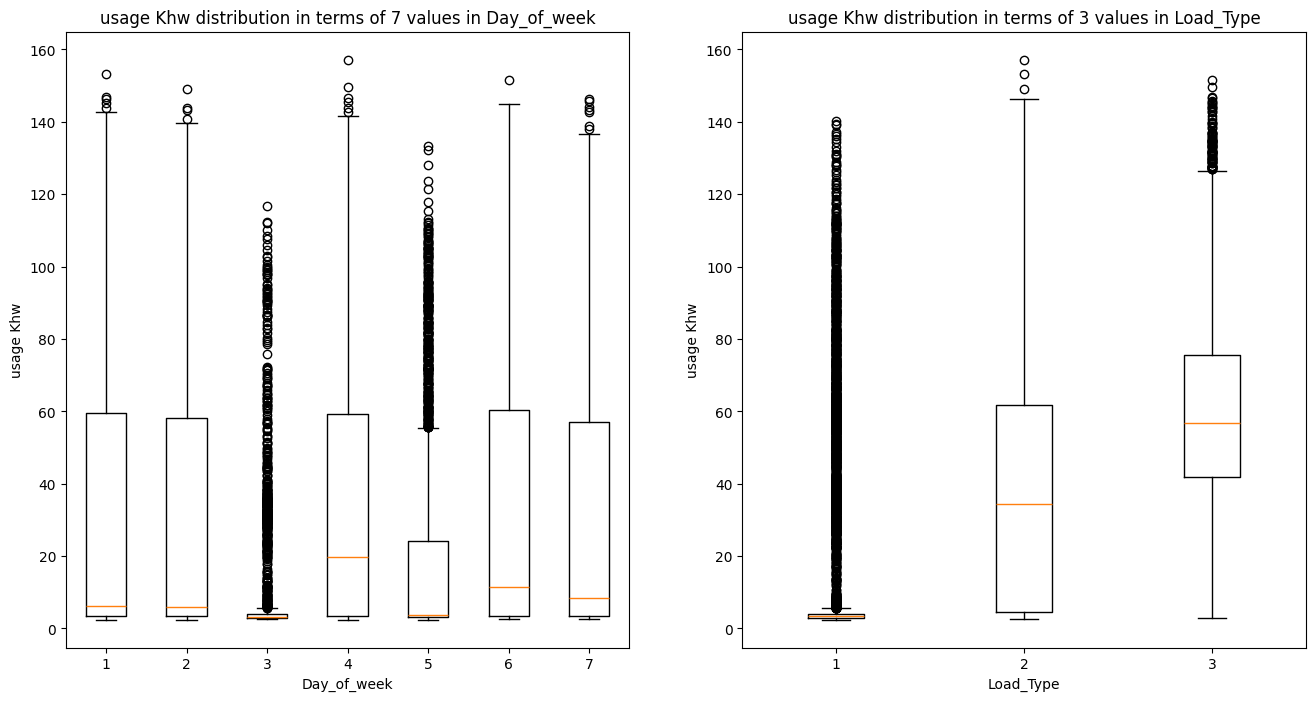

In [49]:
discrete_cols = ['Day_of_week', 'Load_Type']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for i, dc in enumerate(discrete_cols):
	vis.visualize_discrete_values(X_train, 
							   feat_col=dc, 
							   label_col='y', 
							   label_name='usage Khw', 
							   n_most_freq=None, values_as_xticks=True,
							   axes=ax[i], 
							   show=False)

plt.show()

In [ ]:
# 2 main observations here !! for each conti

In [ ]:

# it seems that the categorical variables are indeed useful, let's take a look into the uni-variate distribution (histograms)


In [20]:
# select the target
# try:
# 	y = data.pop('Usage_kWh')
# except KeyError:
# 	# just added the key error exception to rerun the cell in peace...
# 	pass

Index plays no part in predictions, so it should be dropped.

In [24]:
data.drop('df_index', axis=1, inplace=True)

Let's encode the date by splitting it into three columns holding the values of months, days, and hours. We only have the data from a single year, so this information is irrelevant to the data.

In [25]:
def timestamp_explosion(ts):
    months, days, hours = [], [], []
    for timestamp in ts:
        months.append(timestamp.month)
        hours.append(timestamp.hour)
        days.append(timestamp.day)

    return pd.Series(months), pd.Series(hours), pd.Series(days)

months, days, hours = timestamp_explosion(predictors['date'])

In [26]:
predictors.insert(0, 'hour', hours)
predictors.insert(0, 'day', days)
predictors.insert(0, 'month', months)
predictors.drop('date', axis=1, inplace=True)

Simply encoding data about weekend/weekday in numeric form, rather than categoric.

In [27]:
predictors.WeekStatus = predictors.WeekStatus.astype('category').cat.codes

In the paper of the dataset's creators we can find that NSM means Number of Seconds from Midnight, so we can safely drop this column - factor of time is already covered by month, day, and hour columns, as well as day of week and week status.

In [28]:
predictors.drop("NSM", axis=1, inplace=True)

Day of the week and load type can be best encoded with a one-hot encoder.

In [29]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols=["Day_of_week", "Load_Type"], handle_unknown='ignore')

predictors = encoder.fit_transform(predictors)

In [30]:
predictors.head()

,month,day,hour,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Load_Type_1,Load_Type_2,Load_Type_3
0,1,0,1,2.95,0.0,0.0,73.21,100.0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,1,4.46,0.0,0.0,66.77,100.0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,1,3.28,0.0,0.0,70.28,100.0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,1,3.56,0.0,0.0,68.09,100.0,0,1,0,0,0,0,0,0,1,0,0
4,1,1,1,4.50,0.0,0.0,64.72,100.0,0,1,0,0,0,0,0,0,1,0,0


The datatset has no missing values, so we can skip the data inputing part and go straight to the linear regression after splitting the dataset.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8)

# Multiple Linear Regression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

Now, let us evaluate the results of said linear regression.

In [33]:
def evaluate(y_pred: np.ndarray, y_test: np.ndarray):
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    print(f"Mean absolute error: {mean_absolute_error}\nMean squared error: {mean_squared_error}\nRoot mean squared error: {root_mean_squared_error}")
    return mean_absolute_error, mean_squared_error, root_mean_squared_error

evaluate(y_pred, y_test)

Mean absolute error: 2.6554708369894713
Mean squared error: 25.321044881731535
Root mean squared error: 5.032002074893406


(2.6554708369894713, 25.321044881731535, 5.032002074893406)

### Polynomial regression

First, we'll create scatter plots for the dependent *Usage_kWh* against all the independent features of the dataset in order to select the relationship with the most obvious polynomial dependency between them.

In [34]:
len(predictors.columns)

19

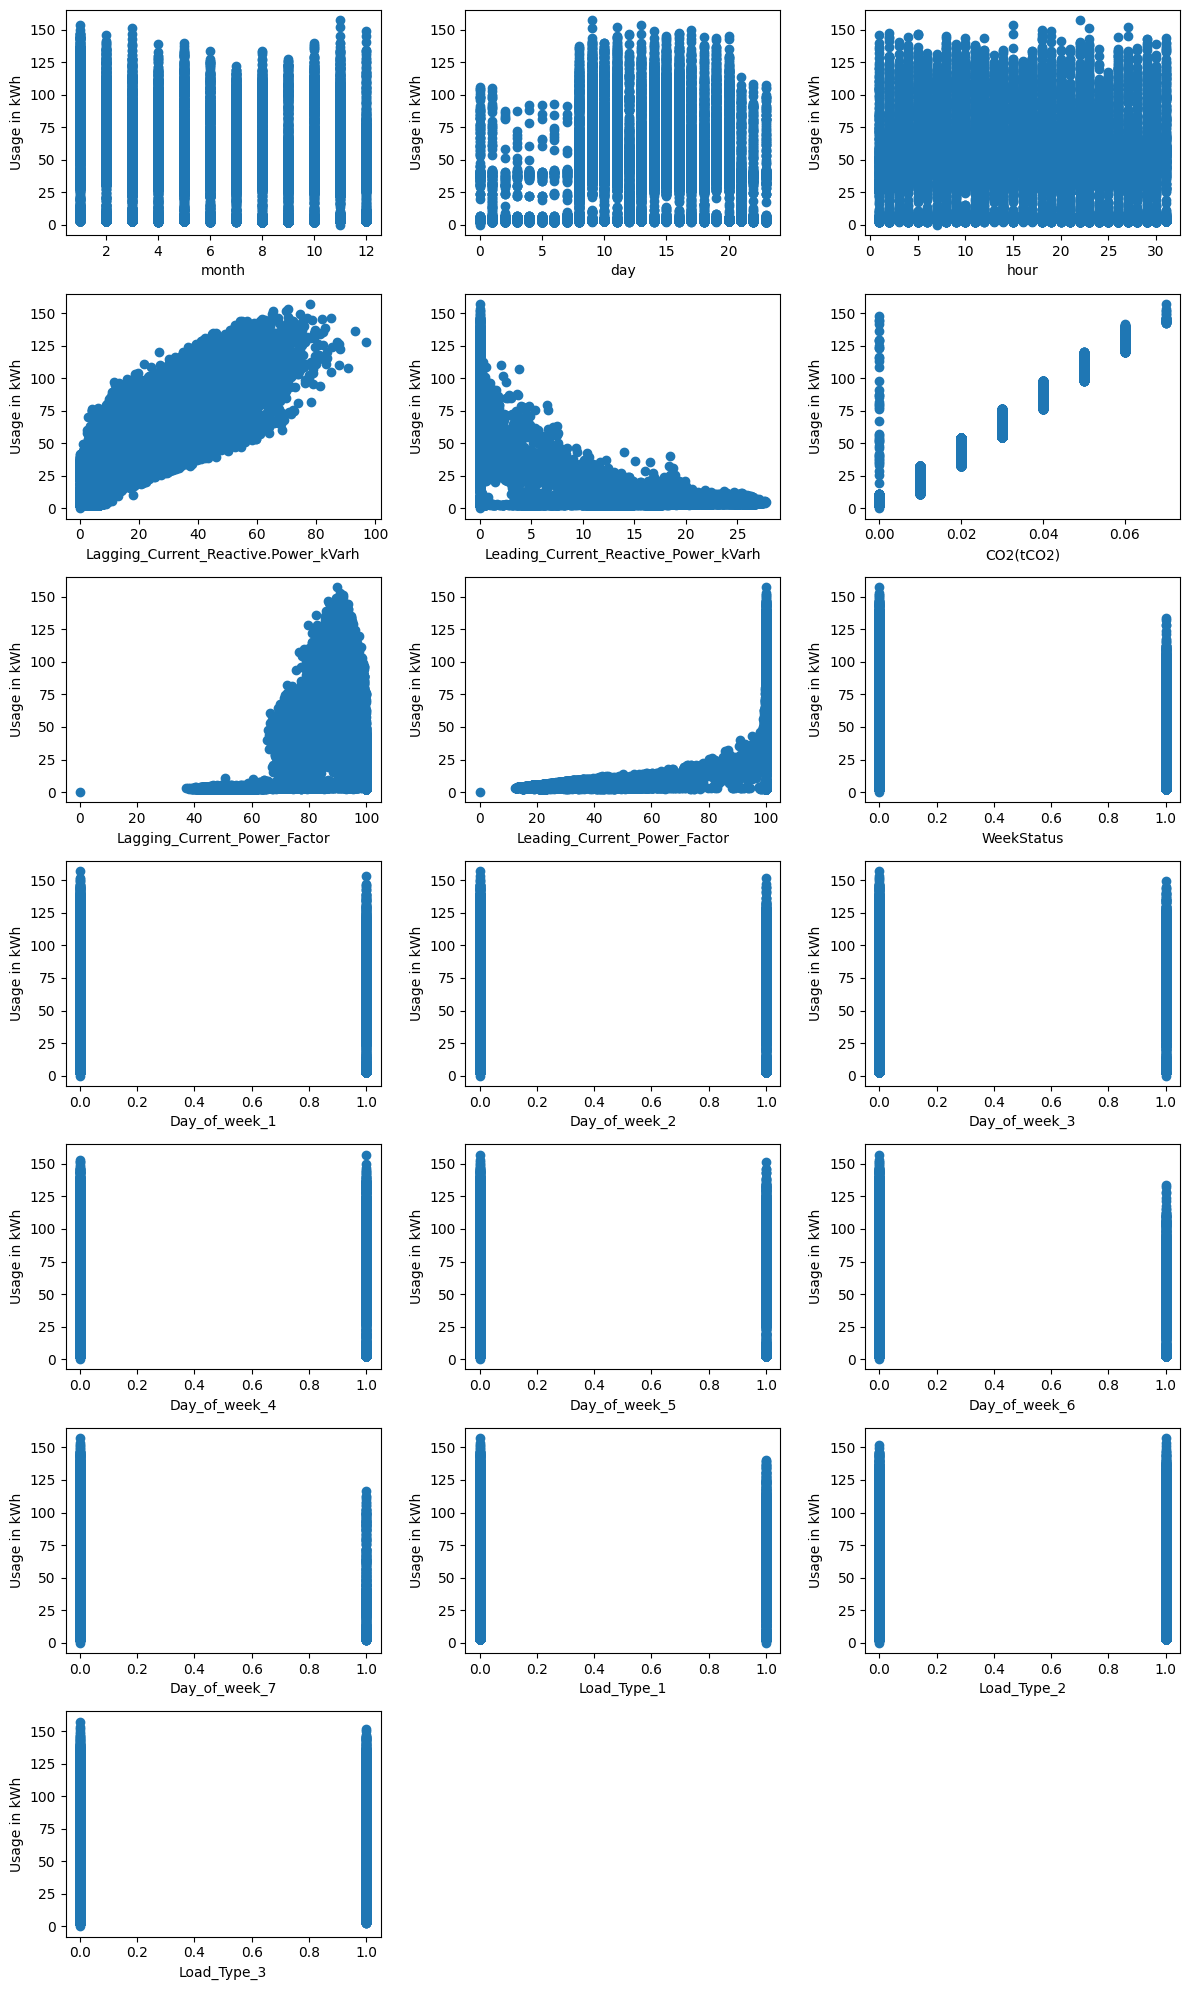

In [35]:
fig, axes = plt.subplots(7, 3, figsize=(12, 20))

for i in range(len(axes)):
    for j in range(len(axes[0])):
        feature_index = len(axes[0])*i + j
        if len(axes[0])*i + j < len(predictors.columns):
            axes[i, j].scatter(predictors.iloc[:, feature_index], target)
            axes[i, j].set_xlabel(predictors.columns[feature_index])
            axes[i, j].set_ylabel('Usage in kWh')
        else:
            fig.delaxes(axes[i, j])
plt.tight_layout()
plt.show()

It appears that Leading current power factor is the feature that is most related to the Usage in Kwh, so we will select it for building a polynomial regression model.

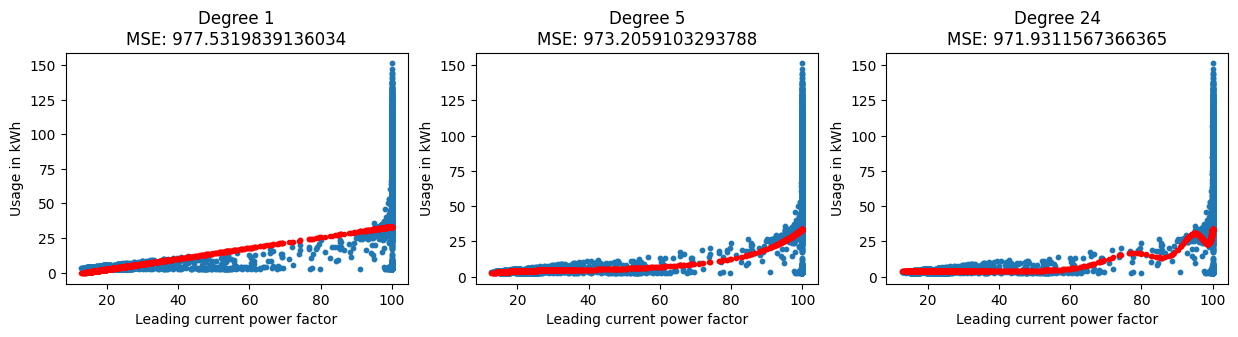

In [37]:
degrees = [1, 5, 24]

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for i in range(len(degrees)):
    poly = PolynomialFeatures(degrees[i])
    poly_features = poly.fit_transform(X_train['Leading_Current_Power_Factor'].values[:, np.newaxis], y_train)
    poly_regression = LinearRegression()
    poly_regression.fit(poly_features, y_train)
    poly_test_features = poly.fit_transform(X_test['Leading_Current_Power_Factor'].values[:, np.newaxis], y_test)
    pred = poly_regression.predict(poly_test_features)
    mse = metrics.mean_squared_error(pred, y_test)
    axes[i].set_title(f"Degree {degrees[i]}\nMSE: {mse}")
    axes[i].set_xlabel("Leading current power factor")
    axes[i].set_ylabel("Usage in kWh")
    axes[i].scatter(X_test['Leading_Current_Power_Factor'], y_test, s=10)
    axes[i].plot(X_test['Leading_Current_Power_Factor'], pred, 'r.')

plt.show()

We can see that in all cases polynomial model fails to capture the relationship between the Leading current power factor and the Usage in kWh, and the MSE is extremely high, thereby it underfits. In terms of bias-variance tradeoff, we can clearly see that the increase in complexity of polynomial leads to a reduction of bias, but not by a meaningful amount, so even at degree 24 the model is clearly too biased and this bias does not result from the model fully capturing the variance of the data.

3. Insights from the datasets:

The dataset was of a good quality, as it had no missing values and we did not have to impute any of the data. Still, some preprocessing was required, as it contained multiple categorical variables and a feature that merely represented the time passed since the beginning of the data tracking, unsuitable for a linear regression model.

As to the structure of the dataset, it contained a lot of features related to time-series data, such as the exact date, day of the week, and whether it's a weekday or a weekend. It also contained many physical statistics in range (0, 100), and I suspect there might be some cross-correlation between them. A lot of features are also valued either 0, or 1, so the task of optimizing feature weights is complicated even more.

The relatively small MSE obtained by the linear regression model suggests that the correct relationship might be found by a polynomial regression with degree greater than 1, but it is computationally expensive, so in our tests we used only one feature, which is definitely not sufficienct to predict the values of Usage in kWh.